In [2]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl
%matplotlib inline

Text(0.5, 1.0, 'Data Points')

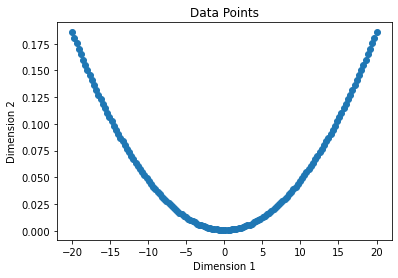

In [5]:
min_vals = -20
max_vals = 20
num_points = 140

x = np.linspace(min_vals, max_vals, num_points)
y = 3*np.square(x)+5
y /= np.linalg.norm(y)
data = x.reshape(num_points,1)
labels = y.reshape(num_points, 1)
plt.scatter(data, labels)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data Points')

In [6]:
mlnn = nl.net.newff([[min_vals, max_vals]], [10,6,1])
mlnn.trainf = nl.train.train_gd
error_progress = mlnn.train(data, labels, epochs=2000, show=100, goal=0.01)

Epoch: 100; Error: 0.15343771246593302;
Epoch: 200; Error: 0.13091453196316805;
Epoch: 300; Error: 0.03805981115602375;
Epoch: 400; Error: 0.017170716747267546;
Epoch: 500; Error: 0.023286889006314086;
Epoch: 600; Error: 0.014644589194433646;
Epoch: 700; Error: 0.02670663230737975;
The goal of learning is reached


Text(0.5, 1.0, 'Actual vs. Predicted')

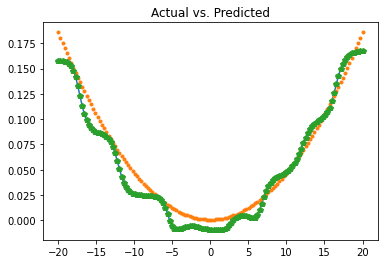

In [7]:
output = mlnn.sim(data)
y_pred = output.reshape(num_points)
x_dense = np.linspace(min_vals, max_vals, num_points*2)
y_dense_pred = mlnn.sim(x_dense.reshape(x_dense.size,1)).reshape(x_dense.size)
plt.plot(x_dense, y_dense_pred, '-', x, y, '.', x, y_pred, 'p')
plt.title('Actual vs. Predicted')